Частина друга: Аналіз файлів

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
table_raw = pd.read_csv('/content/drive/MyDrive/Data S/2017_jun_final.csv')
table_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   N                                 8704 non-null   int64  
 1   Должность                         8704 non-null   object 
 2   Язык.программирования             4854 non-null   object 
 3   Специализация                     1485 non-null   object 
 4   Общий.опыт.работы                 8704 non-null   object 
 5   Опыт.работы.на.текущем.месте      8704 non-null   object 
 6   Зарплата.в.месяц                  8704 non-null   int64  
 7   Изменение.зарплаты.за.12.месяцев  8704 non-null   int64  
 8   Город                             8704 non-null   object 
 9   Размер.компании                   8704 non-null   object 
 10  Тип.компании                      8704 non-null   object 
 11  Пол                               8704 non-null   object 
 12  Возрас

In [4]:
#Прочитайте отриману таблицю, використовуючи метод head
table_raw.head(2)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA


<Axes: title={'center': 'Зарплата за місяць з урахуванням стажу'}, xlabel='Зарплата.в.месяц', ylabel='Count'>

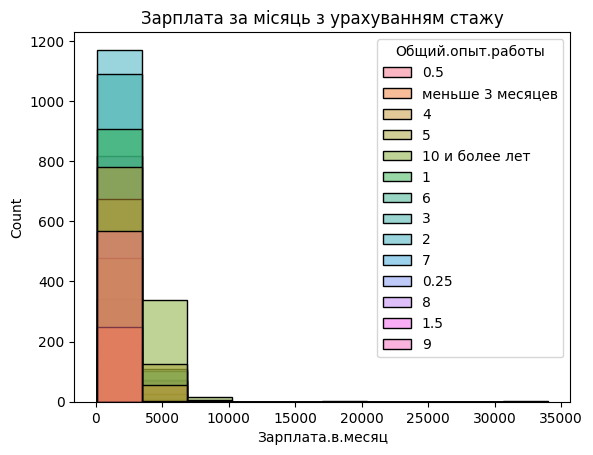

In [5]:
plt.title('Зарплата за місяць з урахуванням стажу')
sns.histplot(data=table_raw, x='Зарплата.в.месяц', bins=10, hue='Общий.опыт.работы')

<Axes: title={'center': 'Зарплата за місяць за гендерною ознакою'}, xlabel='Зарплата.в.месяц', ylabel='Count'>

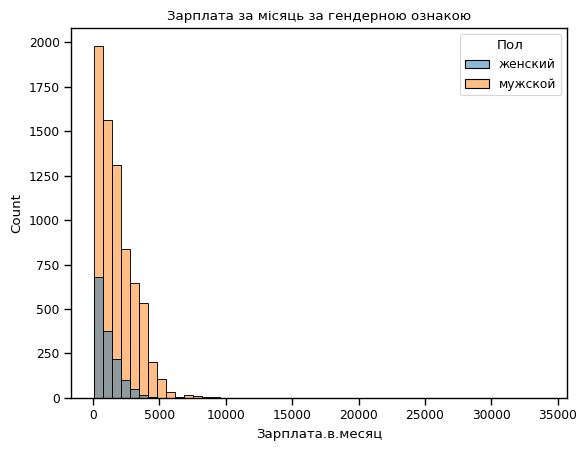

In [26]:
sns.set_context("paper")
plt.title('Зарплата за місяць за гендерною ознакою')
sns.histplot(data=table_raw, x='Зарплата.в.месяц', bins=50, hue='Пол')

<Axes: title={'center': 'Досвід працівників в залежності від віку в різних компаніях за розміром'}, xlabel='Общий.опыт.работы', ylabel='Возраст'>

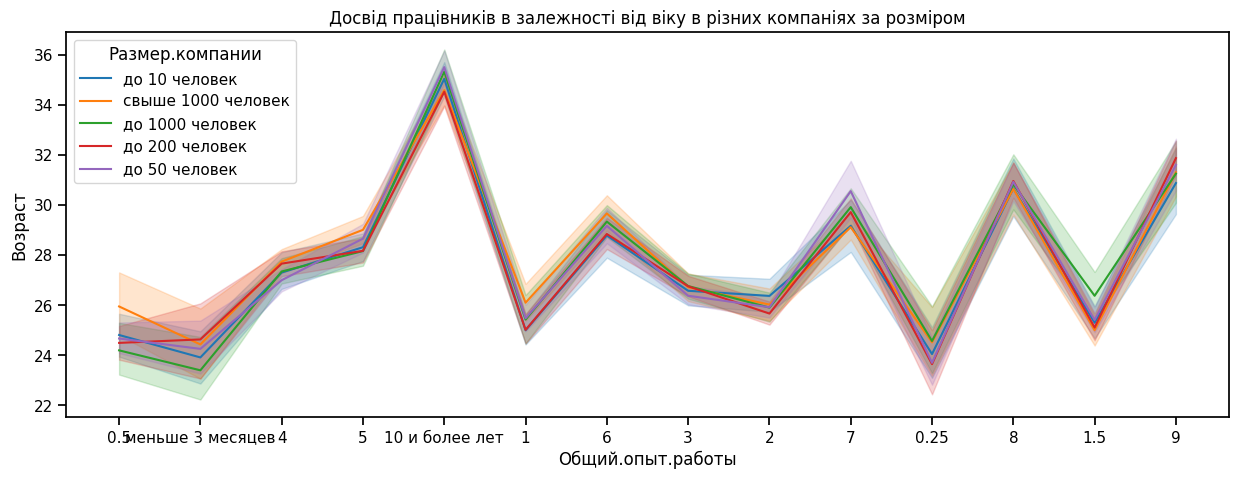

In [28]:
sns.set_context("notebook")
plt.figure(figsize=(15,5))
plt.title('Досвід працівників в залежності від віку в різних компаніях за розміром')
sns.lineplot(data=table_raw, y='Возраст', x='Общий.опыт.работы', hue='Размер.компании')


In [8]:
#Визначте розмір таблиці за допомогою методу shape
table_raw.shape

(8704, 25)

In [9]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
table_raw.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [10]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
table_raw.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [11]:
#Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
tab=table_raw.isna().sum()
tab=tab[tab>0]
print('Перелік видалення', list(tab.index[1:]),'\n')
table=table_raw.drop(columns=list(tab.index[1:]))
print('Таблиця після видалення\n',table.dtypes)
print()
print('Таблиця до видалення\n',table_raw.dtypes)

Перелік видалення ['Специализация', 'Университет', 'Предметная.область', 'Валюта', 'cls'] 

Таблиця після видалення
 N                                     int64
Должность                            object
Язык.программирования                object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Еще.студент                            bool
Уровень.английского                  object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                                int64
dty

In [12]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
table.isna().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [13]:
#Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
table=table.dropna()

In [14]:
#Визначте новий розмір таблиці за допомогою методу shape
table.shape

(4854, 20)

In [15]:
#Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data=table[table['Язык.программирования']=='Python']
python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


<Axes: title={'center': 'Кількість програмістів Python по регіонах України серед опитаних'}, xlabel='Город', ylabel='count'>

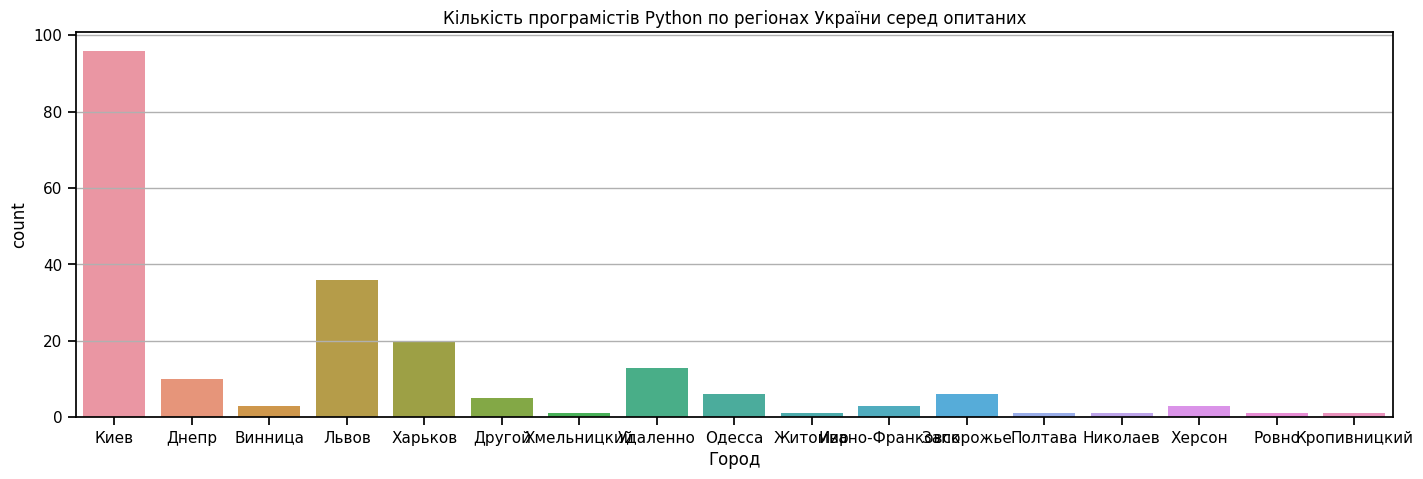

In [16]:
plt.figure(figsize=(17,5))
plt.grid()
plt.title('Кількість програмістів Python по регіонах України серед опитаних')
sns.countplot(data=python_data, x='Город')

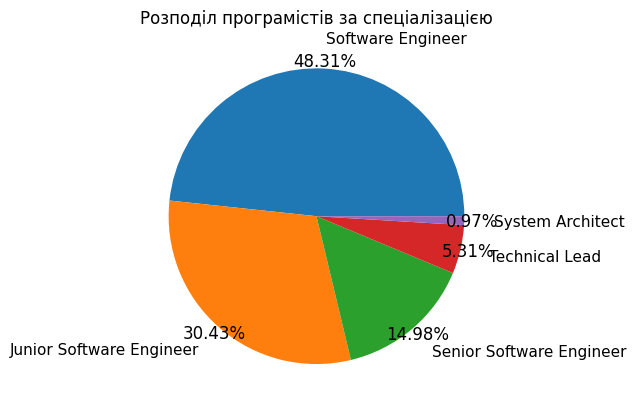

In [37]:
data_pie=python_data['Должность'].value_counts()
plt.title('Розподіл програмістів за спеціалізацією')
plt.pie(
    data_pie,
    labels=data_pie.index,
    autopct="%.2f%%",
    pctdistance=1.05,
    labeldistance=1.2,
)
plt.show()


In [18]:
#Визначте розмір таблиці python_data за допомогою методу shape
python_data.shape

(207, 20)

In [19]:
#Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
python_data2=python_data.groupby(by='Должность')
print(python_data2)
python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


In [20]:
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
python_data3=python_data2.agg({'Зарплата.в.месяц':['min','max']})
python_data3

Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200

In [21]:
#Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
#option 1
def fill_avg_salary(row):
  return row.mean()
avg=python_data3.apply(fill_avg_salary, axis=1)
print(avg,'\n')
#option2
python_data3.apply(lambda x: x.mean(), axis=1)


Должность
Junior Software Engineer     675.0
Senior Software Engineer    5250.0
Software Engineer           2950.0
System Architect            4000.0
Technical Lead              3812.5
dtype: float64 



Должность
Junior Software Engineer     675.0
Senior Software Engineer    5250.0
Software Engineer           2950.0
System Architect            4000.0
Technical Lead              3812.5
dtype: float64

In [22]:
# Створіть описову статистику за допомогою методу describe для нового стовпчика.
avg.describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
dtype: float64

In [23]:
python_data3['avg']=avg
python_data3

Зарплата.в.месяц           avg
                                      min   max        
Должность                                              
Junior Software Engineer              100  1250   675.0
Senior Software Engineer             1300  9200  5250.0
Software Engineer                     500  5400  2950.0
System Architect                     3000  5000  4000.0
Technical Lead                       1425  6200  3812.5

In [24]:
python_data3.to_csv('Soft_Engineer_Salary.csv', index=True)

In [25]:
new_data=pd.read_csv('/content/Soft_Engineer_Salary.csv')
new_data

,Unnamed: 0,Зарплата.в.месяц,Зарплата.в.месяц.1,avg
0,NaN,min,max,NaN
1,Должность,NaN,NaN,NaN
2,Junior Software Engineer,100,1250,675.0
3,Senior Software Engineer,1300,9200,5250.0
4,Software Engineer,500,5400,2950.0
5,System Architect,3000,5000,4000.0
6,Technical Lead,1425,6200,3812.5
